# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

**Business Context**

The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting new electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement. The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

[Companies often analyze user responses to two variants of a product to decide which of the two variants is more effective. This experimental technique, known as A/B testing, is used to determine whether a new feature attracts users based on a chosen metric.]

**Objective**

The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

1. Do the users spend more time on the new landing page than on the existing landing page?

2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

3. Does the converted status depend on the preferred language?

4. Is the time spent on the new page the same for the different language users?



Data Dictionary

The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

user_id - Unique user ID of the person visiting the website

group - Whether the user belongs to the first group (control) or the second group (treatment)

landing_page - Whether the landing page is new or old

time_spent_on_the_page - Time (in minutes) spent by the user on the landing page

converted - Whether the user gets converted to a subscriber of the news portal or not

language_preferred - Language chosen by the user to view the landing page


## Import all the necessary libraries

In [157]:
#import the important packages
import pandas as pd #library used for data manipulation and analysis
import numpy as np # library used for working with arrays.
import matplotlib.pyplot as plt # library for plots and visualisations
import seaborn as sns # library for visualisations
import math
from scipy.stats import ttest_ind
%matplotlib inline

import scipy.stats as stats # this library contains a large number of probability distributions as well as a growing library of statistical functions.

In [158]:
# connect google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Reading the Data into a DataFrame

In [159]:
# import data
df = pd.read_csv('/content/drive/MyDrive/Google Drive/Documents/Personal/School/UT/UT Post Grad McCombs/Project 2/abtest.csv')

In [160]:
# print head
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [161]:
# print head
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [162]:
# print tail
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [163]:
# print describe
df.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


In [164]:
# print shape
df.shape

(100, 6)

In [165]:
# print info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [166]:
# print objects
df.describe(include=['object'])

,group,landing_page,converted,language_preferred
count,100,100,100,100
unique,2,2,2,3
top,control,old,yes,Spanish
freq,50,50,54,34


In [167]:
# check for missing values
df.isna().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

In [168]:
# check for null values
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

In [169]:
# check for duplicates
df.duplicated().sum()

0

### Observation:

The data that was given to my by E-News Express appears to be organized data with no missing or duplicates.

### Univariate Analysis

In [170]:
# look at time spent on the page column
df['time_spent_on_the_page'].describe()

count    100.000000
mean       5.377800
std        2.378166
min        0.190000
25%        3.880000
50%        5.415000
75%        7.022500
max       10.710000
Name: time_spent_on_the_page, dtype: float64

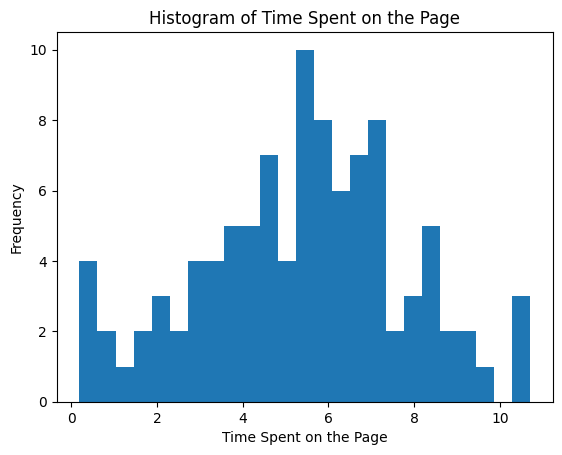

In [171]:
# plot time spent on the page
plt.hist(df['time_spent_on_the_page'], bins=25)
plt.xlabel('Time Spent on the Page')
plt.ylabel('Frequency')
plt.title('Histogram of Time Spent on the Page')
plt.show()

In [172]:
# count language preferred
df['language_preferred'].value_counts()

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

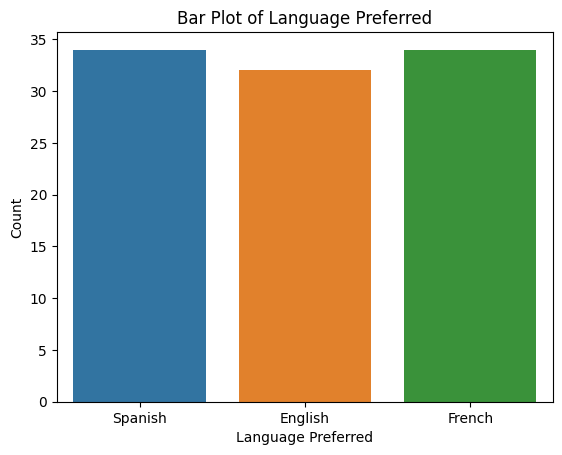

In [173]:
# plot language preferred
sns.countplot(data=df, x='language_preferred')
plt.xlabel('Language Preferred')
plt.ylabel('Count')
plt.title('Bar Plot of Language Preferred')
plt.xticks()
plt.show()

In [174]:
# count conversions
df['converted'].value_counts()

yes    54
no     46
Name: converted, dtype: int64

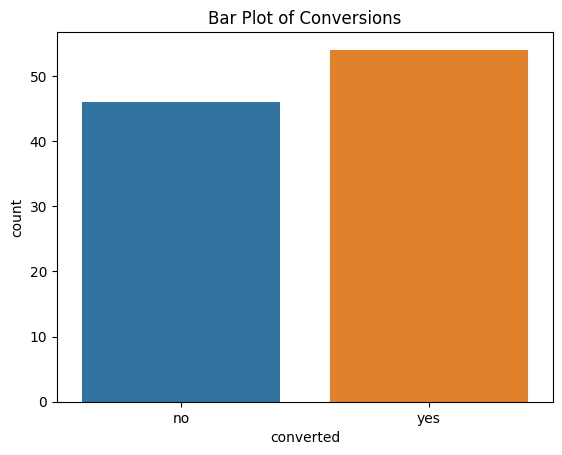

In [175]:
# plot conversions
sns.countplot(data=df,x='converted')
plt.title('Bar Plot of Conversions')
plt.xticks()
plt.show()

In [176]:
# count group
df['group'].value_counts()

control      50
treatment    50
Name: group, dtype: int64

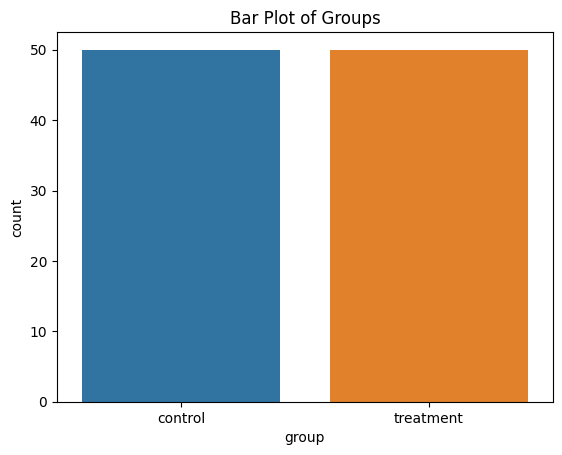

In [177]:
# plot group
sns.countplot(data=df,x='group')
plt.title('Bar Plot of Groups')
plt.xticks()
plt.show()

## Observation:

The total sample is 100 users, 50 in each group. This is a small sample size. It appears that the new landing page is converting more users than the old page. Preferred language doesnt appear to make a difference.

### Bivariate Analysis

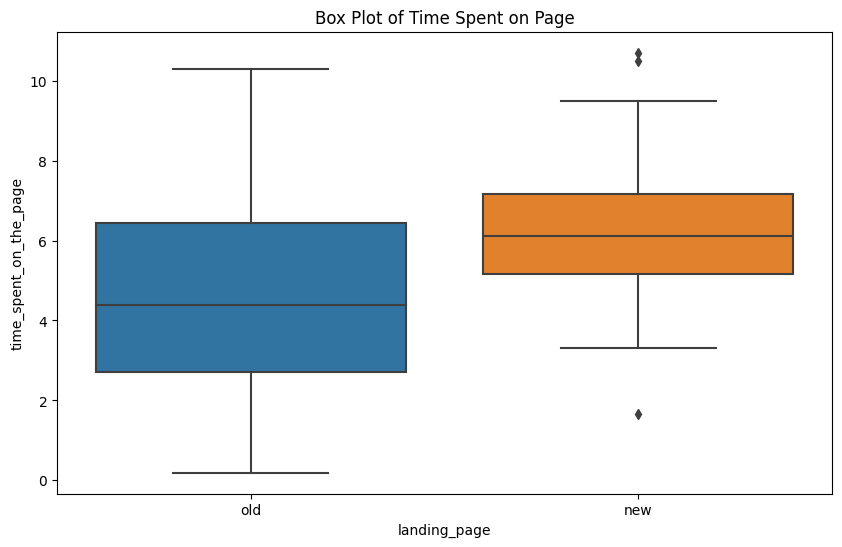

In [178]:
# plot landgin page and time spent on oage
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='landing_page',y='time_spent_on_the_page')
plt.title('Box Plot of Time Spent on Page')
plt.xticks()
plt.show()

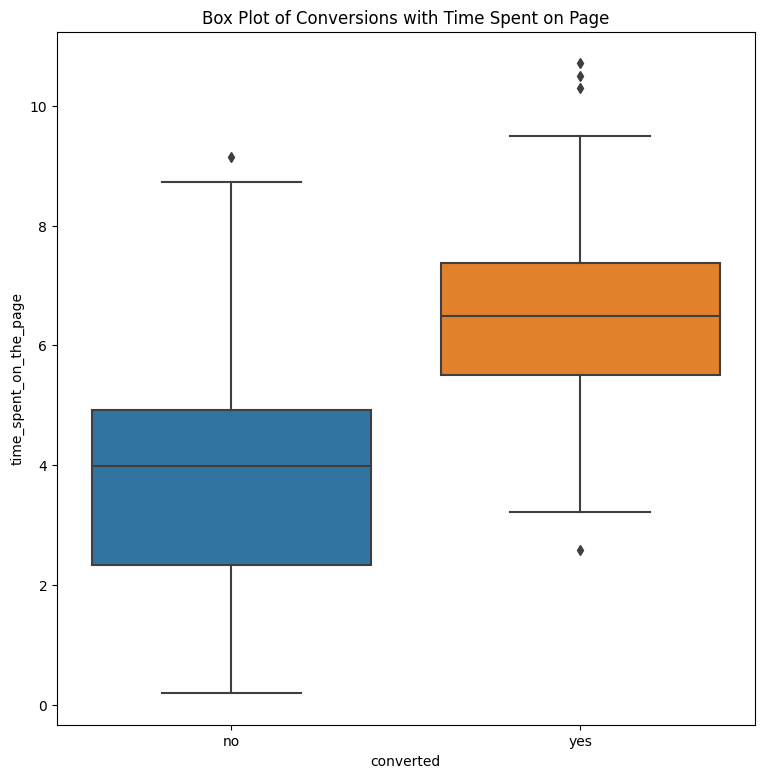

In [179]:
# plot converted and time spent on page
plt.figure(figsize=(9, 9))
sns.boxplot(data = df, x = 'converted', y = 'time_spent_on_the_page')
plt.title('Box Plot of Conversions with Time Spent on Page')
plt.xticks()
plt.show()

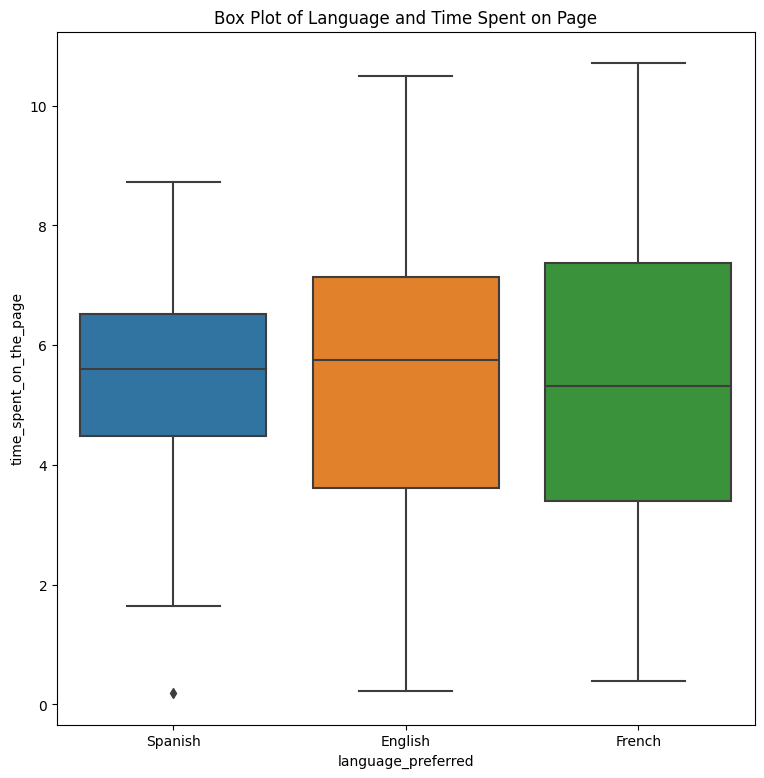

In [180]:
# plot language preferred and time spent on page
plt.figure(figsize=(9, 9))
sns.boxplot(data = df, x = 'language_preferred', y = 'time_spent_on_the_page')
plt.title('Box Plot of Language and Time Spent on Page')
plt.xticks()
plt.show()

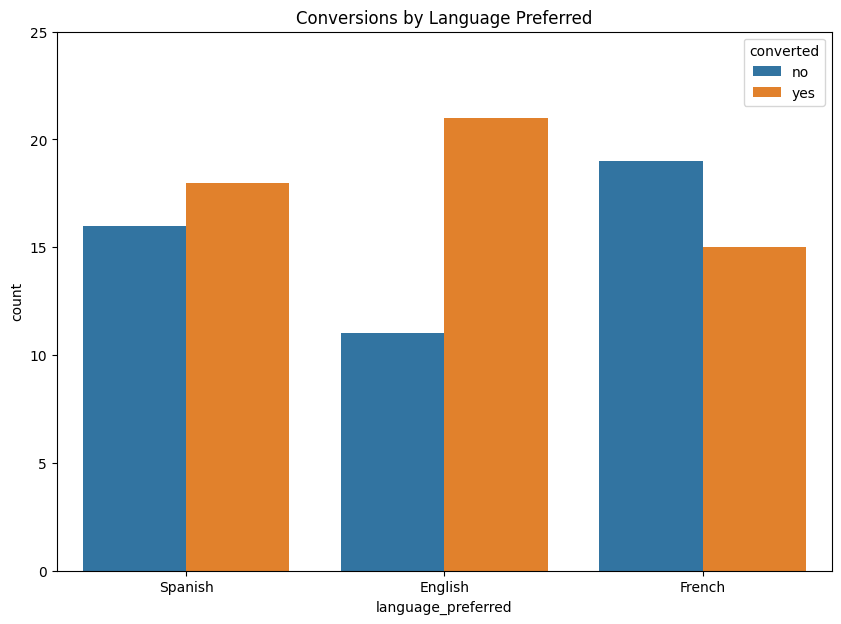

In [181]:
# plot conversions of preferred languages
plt.figure(figsize=(10,7))
plt.title('Conversions by Language Preferred')
plt.ylim(0,25)
sns.countplot(data=df, x='language_preferred',hue='converted')
plt.xlabel('language_preferred');

## Observation:

More time is being spent on the new landing page and appears to be resulting in more conversions. There does not appear to be a corelation with the language preferrence but more analysis will be needed.

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

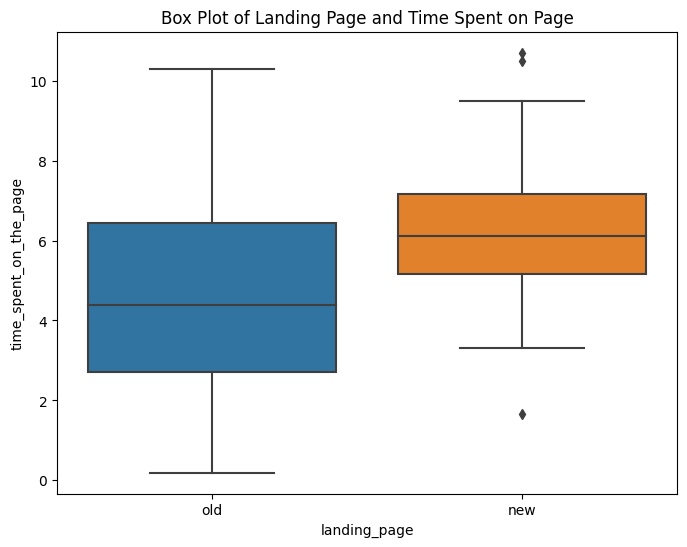

In [182]:
# plot landing page and time spent on page
plt.figure(figsize=(8,6))
sns.boxplot(x = 'landing_page', y = 'time_spent_on_the_page', data = df)
plt.title('Box Plot of Landing Page and Time Spent on Page')
plt.xticks()
plt.show()

### Step 1: Define the null and alternate hypotheses

**Do the users spend more time on the new landing page than on the old landing page?**

Null Hypothesis $H_0$: The average time spent on the new landing page is less than or equal to the average time spent on the old landing page. (μ_new <= μ_old)

Alternative Hypothesis $H_a$: The average time spent on the new landing page is greater than the average time spent on the old landing page. (μ_new > μ_old)

### Step 2: Select Appropriate test

To find if users spend more time on the new landing page or the existing landing page I will perform a two-sample T-test.

### Step 3: Decide the significance level

The signifigance level is stated in the objective and is 5%.

### Step 4: Collect and prepare data

In [183]:
# Filter the DataFrame for 'control' group
control_group = df[df['group'] == 'control']

# Count the number of conversions ('yes' in the 'converted' column) in the treatment group
conversions = control_group['converted'].value_counts().get('yes', 0)

print("Number of conversions from the old landing page (control group):", conversions)

Number of conversions from the old landing page (control group): 21


In [184]:
# Filter the DataFrame for 'treatment' group
treatment_group = df[df['group'] == 'treatment']

# Count the number of conversions ('yes' in the 'converted' column) in the treatment group
conversions = treatment_group['converted'].value_counts().get('yes', 0)

print("Number of conversions from the new landing page (treatment group):", conversions)

Number of conversions from the new landing page (treatment group): 33


In [185]:
# Extract time spent data for treatment and control groups
time_spent_new = df[df['group'] == 'treatment']['time_spent_on_the_page']
time_spent_old = df[df['group'] == 'control']['time_spent_on_the_page']

In [186]:
# find the sample means and sample standard deviations for the two samples
print('The mean time spent on page for the new page is ' + str(time_spent_new.mean()))
print('The mean time spent on page for the old page it ' + str(time_spent_old.mean()))
print('The standard deviation of time spent on page for the new page is ' + str(round(time_spent_new.std(), 2)))
print('The standard deviation of time spent on page for the old page is ' + str(round(time_spent_old.std(), 2)))

The mean time spent on page for the new page is 6.2232
The mean time spent on page for the old page it 4.532400000000001
The standard deviation of time spent on page for the new page is 1.82
The standard deviation of time spent on page for the old page is 2.58


### Step 5: Calculate the p-value

In [187]:
# find the p-value
test_stat, p_value = ttest_ind(time_spent_new, time_spent_old.dropna(), equal_var = False, alternative = 'greater')
print('The p-value is ', p_value)

The p-value is  0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

In [188]:
# compare p-value with alpha
alpha = .05
p_value = 0.0001392381225166549

if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Reject the null hypothesis


### Step 7:  Draw inference

Since the p-value is less than the level of signifigance, I will reject the null hypothesis. Hence, we have enough evidence to support that users are spending more time on the new landing page.

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

Perform Visual Analysis

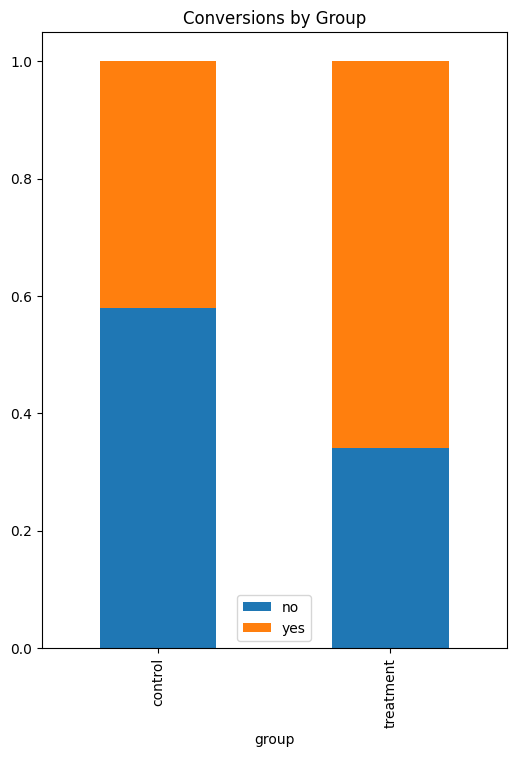

In [189]:
# plot conversions of old landing page and new
pd.crosstab(df['group'],df['converted'],normalize='index').plot(kind="bar", figsize=(6,8),stacked=True)
plt.title('Conversions by Group')
plt.xticks()
plt.legend()
plt.show()

Step 1: Define the null and alternate hypotheses

Is the conversion rate for the new page greater than the conversion rate for the old page?

Null Hypothesis  𝐻0 : The conversion rate for the new landing page is less than or equal to the conversion rate for the existing landing page. (p_new <= p_existing)

Alternative Hypothesis  𝐻𝑎 : The conversion rate for the new landing page is greater than the conversion rate for the existing landing page. (p_new > p_existing)

Step 2: Select Appropriate test

To find if the conversion rate of the new page is greater than the old page I will use a two proportion Z-test.

Step 3: Decide the significance level

The signifigance level is stated in the objective and is 5%.

Step 4: Collect and prepare data

In [190]:
# Filter the DataFrame for control group
control_group = df[df['group'] == 'control']

# Count the number of conversions ('yes' in the 'converted' column) in the treatment group
conversions = control_group['converted'].value_counts().get('yes', 0)

print("Number of conversions from the old landing page (control group):", conversions)

Number of conversions from the old landing page (control group): 21


In [191]:
# Filter the DataFrame for 'treatment' group
treatment_group = df[df['group'] == 'treatment']

# Count the number of conversions ('yes' in the 'converted' column) in the treatment group
conversions = treatment_group['converted'].value_counts().get('yes', 0)

print("Number of conversions from the new landing page (treatment group):", conversions)

Number of conversions from the new landing page (treatment group): 33


Step 5: Calculate the p-value

In [192]:
# import ztest
from statsmodels.stats.proportion import proportions_ztest

# set the counts of conversions
conversions = np.array([21, 33])

# set the sample sizes
nobs = np.array([50, 50])

# find the p-value
test_stat, p_value = proportions_ztest(conversions, nobs)
print('The p-value is ' + str(p_value))

The p-value is 0.016052616408112556


Step 6: Compare the p-value with  𝛼

In [193]:
# compare p-value with alpha
alpha = .05
p_value = 0.016052616408112556

if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Reject the null hypothesis


Step 7: Draw inference

Because the p-value is less than the alpha I will reject the null hypothesis. The new landing page is converting more users than the old landing page.    

## 3. Does the conversion rate depend on the preferred language? Are these two variable independent or related?

Perform Visual Analysis

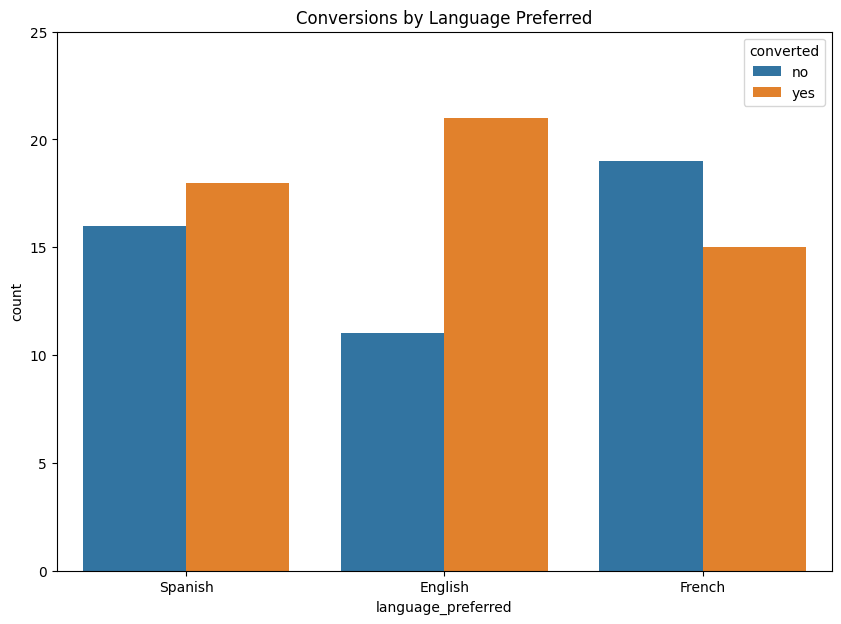

In [194]:
# plot conversions of preferred languages
plt.figure(figsize=(10,7))
plt.title('Conversions by Language Preferred')
plt.ylim(0,25)
sns.countplot(data=df, x='language_preferred',hue='converted')
plt.xlabel('language_preferred');

Step 1: Define the null and alternate hypotheses

Does the converted status depend on the preferred language?

Null Hypothesis  𝐻0 : The converted status is independent of the preferred language.

Alternative Hypothesis  𝐻𝑎 : The converted status depends on the preferred language.

Step 2: Select Appropriate test

Chi-Square test of independance

Step 3: Decide the significance level

The signifigance level is stated in the objective and is 5%.

Step 4: Collect and prepare data

In [195]:
# print head
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


Step 5: Calculate the p-value

In [196]:
# create table of conversions from different preferred languages
contingency_table = pd.crosstab(df['language_preferred'], df['converted'])

In [197]:
# import chi squared test
from scipy.stats import chi2_contingency

# find the p-value
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print('The p-value is', p_value)

The p-value is 0.2129888748754345


Step 6: Compare the p-value with  𝛼

In [198]:
# create table of conversions from different preferred languages
contingency_table = pd.crosstab(df['language_preferred'], df['converted'])
# import chi squared test
from scipy.stats import chi2_contingency

# find the p-value
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print('The p-value is', p_value)
# compare p-value to alpha
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

The p-value is 0.2129888748754345
As the p-value 0.2129888748754345 is greater than the level of significance, we fail to reject the null hypothesis.


Step 7: Draw inference

The p-value is greater than the level of significance so I will reject the null hypothesis. Conversions are independent on the language preferred.

## 4. Is the time spent on the new page the same for the different language users?

Perform Visual Analysis

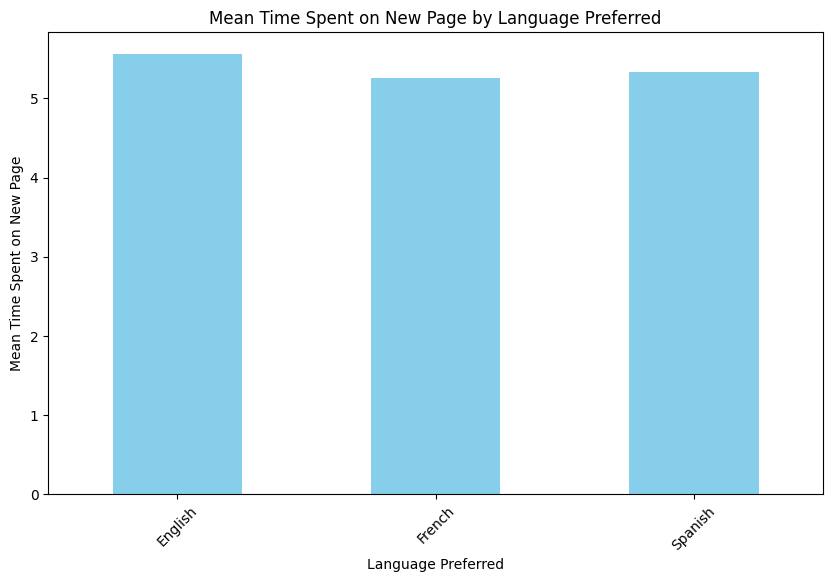

In [199]:
# calculate the mean time spent for each language group
mean_time_by_group = df.groupby('language_preferred')['time_spent_on_the_page'].mean()

# plot
plt.figure(figsize=(10, 6))
mean_time_by_group.plot(kind='bar', color='skyblue')
plt.title('Mean Time Spent on New Page by Language Preferred')
plt.xlabel('Language Preferred')
plt.ylabel('Mean Time Spent on New Page')
plt.xticks(rotation=45)
plt.show()

Step 1: Define the null and alternate hypotheses

Is the time spent on the new page the same for different language users?

Null Hypothesis  𝐻0 : The average time spent on the new landing page is the same for different language users.

Alternative Hypothesis  𝐻𝑎 : The average time spent on the new landing page is different for at least one pair of language groups.

Step 2: Select Appropriate test

One way ANOVA test.

Step 3: Decide the significance level

The signifigance level is stated in the objective and is 5%.

Step 4: Collect and prepare data

In [200]:
# create a table of time spent on page and preferred languages
groups = df['language_preferred'].unique()
data_by_group = [df[df['language_preferred'] == group]['time_spent_on_the_page'] for group in groups]

Step 5: Calculate the p-value

In [201]:
# perform ANOVA test
f_statistic, p_value = stats.f_oneway(*data_by_group)

print('The p-value is', p_value)

The p-value is 0.8665610536012648


Step 6: Compare the p-value with  𝛼

In [202]:
# compare the p-value to alpha
groups = df['language_preferred'].unique()
data_by_group = [df[df['language_preferred'] == group]['time_spent_on_the_page'] for group in groups]

# Perform the ANOVA test
f_statistic, p_value = stats.f_oneway(*data_by_group)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

Fail to reject the null hypothesis.


Step 7: Draw inference

Since the p-value is greater than the aalpha it fails to reject the null hypothesis. There is no statistical difference between the amount of time spent on the landing page for the different preferred languages.

## Conclusion and Business Recommendations

## **Summary of Objectives and Results**

1. Do the users spend more time on the new landing page than on the existing landing page?

Result:
There is enough evidence to support that users are spending more time on the new landing page.


2. Is the conversion rate of the new page greater than the conversion rate for the old page?

Result:
The new landing page is converting more users than the old landing page.



3. Does the converted status depend on the preferred language?

Result:
Conversions are independent of the preferred language.



4. Is the time spent on the new page the same for the different language users?

Result:
There is no statistical difference between the amount of time spent on the landing page for the different preferred languages.

As outlined above, the new landing page is increasing the number of subscriptions compared to the old landing page. I have also found that there is no statistical evidence that suggest that the preferred language has any effect on conversions or the time spent on the landing page.


## Business Recommendations

The new landing page has been successful at converting more users to subscribers. I recommned that the old landing page be replaced with the new landing page. You should continue to offer the preferred languages to your users. Since there is no effect on conversions or the time spent on the page it doesnt hurt to offer this option. Having this option is likely increasing your user base.

Even though I was able to accomplish the objectives with the given data, the data size was rather small. I would suggest you continue to run the A/B testing to get a larger sample size and then retest to see if the results hold true.







___

In [203]:
from nbconvert import HTMLExporter
import nbformat

# Load the Colab notebook
notebook_path = '/content/drive/MyDrive/Colab Notebooks/P.2_Full_Code.ipynb'  # Replace with your notebook's path
notebook = nbformat.read(notebook_path, as_version=4)

# Create an HTMLExporter instance
html_exporter = HTMLExporter()

# Convert the notebook to HTML
(html, _) = html_exporter.from_notebook_node(notebook)

# Save the HTML to a file
output_file_path = '/content/drive/MyDrive/Colab Notebooks/P.2_Full_Code.html'  # Replace with your desired output path
with open(output_file_path, 'w', encoding='utf-8') as f:
    f.write(html)